In [302]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score as asc
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import linear_model
from sklearn import svm
import matplotlib.pylab as plt
from sklearn import preprocessing
from sklearn.feature_selection import RFE
import tqdm

## Считываем и обрабатываем данные

In [303]:
df = pd.read_csv('voice.csv', sep=',') 
df

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male
5,0.132786,0.079557,0.119090,0.067958,0.209592,0.141634,1.932562,8.308895,0.963181,0.738307,...,0.132786,0.110132,0.017112,0.253968,0.298222,0.007812,2.726562,2.718750,0.125160,male
6,0.150762,0.074463,0.160106,0.092899,0.205718,0.112819,1.530643,5.987498,0.967573,0.762638,...,0.150762,0.105945,0.026230,0.266667,0.479620,0.007812,5.312500,5.304688,0.123992,male
7,0.160514,0.076767,0.144337,0.110532,0.231962,0.121430,1.397156,4.766611,0.959255,0.719858,...,0.160514,0.093052,0.017758,0.144144,0.301339,0.007812,0.539062,0.531250,0.283937,male
8,0.142239,0.078018,0.138587,0.088206,0.208587,0.120381,1.099746,4.070284,0.970723,0.770992,...,0.142239,0.096729,0.017957,0.250000,0.336476,0.007812,2.164062,2.156250,0.148272,male
9,0.134329,0.080350,0.121451,0.075580,0.201957,0.126377,1.190368,4.787310,0.975246,0.804505,...,0.134329,0.105881,0.019300,0.262295,0.340365,0.015625,4.695312,4.679688,0.089920,male


In [317]:
#Функция для замены строковых значений пола на цифровые
def from_string2float(string):
    if string == 'male':
        string = 1
        return string
    else:
        string = 0
        return string

#Применяем функцию обработки к столбцу пола
df['label'] = df['label'].map(from_string2float)

In [321]:
def separation():    
    #Ввод доли для разделения выборки на тестовую и обучающую
    print('Введите долю выборки, которая будет тестовой от 0.1 до 0.9 (оптимальная работа если тестовая выборка меньше 0.5)')
    while True:
        try:
            a = float(input())
            if a>0.9 or a<0.1:
                print('Введите цифру в заданном интервале')
            else:
                size_sep=a 
                break
        except ValueError:
            print('Введите цифру')
    #Разделение выборки на тестовую и обучающую
    train, test = train_test_split(df, test_size=size_sep)
    tlearn=train.drop('label',axis=1)
    ttrain=train['label']
    check=test['label']
    test=test.drop('label',axis=1)
    return size_sep

## Блок классификации

In [306]:
def launch():
    df = pd.read_csv('voice.csv', sep=',') 
    #Вывод названий алгоритмов для выбора пользователем
    print(' Выберите номера желаемых методов классификации','\n',"1- Метод опорных векторов(SVR)",'\n','2- Cтохастический градиентный спуск(SGDRegressor)','\n',
    '3- Баесовская ridge регрессия (BayesianRidge)','\n','4- Лассо модель с наименьшей угловой регрессией (LassoLars)','\n',
    '5- Баесовский Automatic Relevance Determination (RegressionARDRegression)','\n', '6- AggressiveRegressor','\n',
    '7- Theil-Sen Estimator (TheilSenRegressor)','\n','8- Линейная регрессия (LinearRegression)','\n','9- К-ближайших соседей(KNeighborsClassifier)','\n',
    '10- Логистическая регрессия(LogisticRegression)')
    b=[]
    r = [1,2,3,4,5,6,7,8,9,10]
    #Цикл для выбора пользователем алгоритмов
    while True:
        try:
            a = input()
            if a == '':
                break
            elif int(a) not in r or int(a) in b:
                print('Введите цифру, соответствующую алгоритму. Цифры не должны повторяться')
            else:
                b.append(int(a))
        except ValueError:
            print('Введите цифру')
    return b

In [307]:
#Функция обучения алгоримов 
def engine(string):
    predictions={}
#     classifiers = [
#         svm.SVR(),
#         linear_model.SGDRegressor( penalty='elasticnet',fit_intercept=False),
#         linear_model.BayesianRidge(),
#         linear_model.LassoLars(),
#         linear_model.ARDRegression(),
#         linear_model.PassiveAggressiveRegressor(),
#         linear_model.TheilSenRegressor(),
#         linear_model.LinearRegression()]

    trainingData    = tlearn
    trainingScores  = ttrain
    predictionData  = test

    for i in tqdm.tqdm_notebook(string):
        clf = list_of_algorithms[i]
        clf.fit(trainingData, trainingScores)
        predictions[list_of_algorithms[i]]=abs(np.around(clf.predict(predictionData)))
    return predictions
    

In [308]:
#Словарь алгоритмов
list_of_algorithms={1:svm.SVR(), 2:linear_model.SGDRegressor(penalty='l1',loss='huber'), 3:linear_model.BayesianRidge(), 4:linear_model.LassoLars(normalize=True), 
     5:linear_model.ARDRegression(), 6:linear_model.PassiveAggressiveRegressor(), 7:linear_model.TheilSenRegressor(),
     8:linear_model.LinearRegression(),9:KNeighborsClassifier(),10:LogisticRegression()}

C:\AAnaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\AAnaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.passive_aggressive.PassiveAggressiveRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [309]:
def preparation(predictions):    
    #Цикл для обработки значений предсказаний. Если значение >1, считаем, что это мужчина

    for i,j in predictions.items():
        for a in range(len(j)):
            if predictions[i][a] > 1:
                predictions[i][a]=1


    return predictions

[0.78391167192429023, 0.4952681388012618, 0.95741324921135651, 0.4952681388012618, 
 0.95583596214511046, 0.49684542586750791, 0.94637223974763407, 0.95741324921135651]

## Визуализация итогов классификации

In [318]:
def visualization(accuracy,entirety,Fmera,predictions):    
    X = []
    print(" Данные были разделены в соотношении:","\n","обучающая выборка",1-size_sep,'и',size_sep, 'тестовая')
    for i in range(len(predictions.keys())):
        X.append(i+1)
    plt.bar(X,accuracy,color='orange',xerr=0.55,ecolor='g')
    plt.show()
    c=1
    for i in predictions.keys():
        print(c,' - ',i,"\n","\n","Точность данного алгортима= ",accuracy[c-1],"\n","Полнота данного алгортима= ",entirety[c-1],'\n',
              "Fмера данного алгортима= ",Fmera[c-1],'\n')
        c+=1

## Главная функция

 Выберите номера желаемых методов классификации 
 1- Метод опорных векторов(SVR) 
 2- Cтохастический градиентный спуск(SGDRegressor) 
 3- Баесовская ridge регрессия (BayesianRidge) 
 4- Лассо модель с наименьшей угловой регрессией (LassoLars) 
 5- Баесовский Automatic Relevance Determination (RegressionARDRegression) 
 6- AggressiveRegressor 
 7- Theil-Sen Estimator (TheilSenRegressor) 
 8- Линейная регрессия (LinearRegression) 
 9- К-ближайших соседей(KNeighborsClassifier) 
 10- Логистическая регрессия(LogisticRegression)
1
2
3
4
6
7
8
9
10

Введите долю выборки, которая будет тестовой от 0.1 до 0.9 (оптимальная работа если тестовая выборка меньше 0.5)
0.4


A Jupyter Widget


 Данные были разделены в соотношении: 
 обучающая выборка 0.6 и 0.4 тестовая


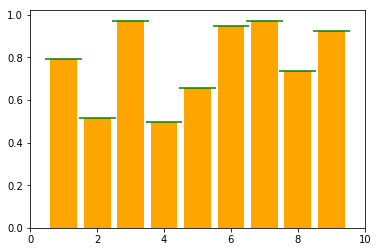

1  -  SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False) 
 
 Точность данного алгортима=  0.7917981072555205 
 Полнота данного алгортима=  0.7944969818913481 
 Fмера данного алгортима=  2.3834909456740445 

2  -  SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='huber', max_iter=5, n_iter=None, penalty='l1', power_t=0.25,
       random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False) 
 
 Точность данного алгортима=  0.5141955835962145 
 Полнота данного алгортима=  0.6178517206477733 
 Fмера данного алгортима=  1.8535551619433197 

3  -  BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
       fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
       normalize=False, tol=0.001, verbose=False) 
 
 Точность данного алгортима=  0.970031

In [323]:
%%time

#Запуск программы
algs = launch()

#Выбор соотношения тестовой выборки и обучающей
size_sep=separation()

#Запуск классификации
predictions = engine(algs)

#Проверка на значение, превышающее 1
predictions = preparation(predictions)

#Обработка предсказанных значений
accuracy,entirety,Fmera = pri(predictions,check)

#Построение графиков
visualization(accuracy,entirety,Fmera,predictions)

In [ ]:
def pri(predictions,check):
    accuracy=[]
    entirety=[]
    Fmera=[]
    num=0
    for p in predictions.values():
        predicted_values=[]
        for j in p:
            predicted_values.append(int(j))
        true_walues=0
        w_for_entirety=0
        m_for_entirety=0
        m=0
        total_woman=0
        for i in check.values:
            if i == predicted_values[m]: 
                true_walues+=1 
                m+=1
            else: m+=1
        accuracy.append(true_walues/len(predicted_values))
        m=0
        for i in check.values:
            if i == predicted_values[m] and i == 0: 
                w_for_entirety+=1 
                m+=1
            else: m+=1
        m=0
        for i in check.values:
            if i == predicted_values[m] and i == 1: 
                m_for_entirety+=1 
                m+=1
            else: m+=1
        for i in predicted_values:
            if i==0:
                total_woman+=1
        try:            
            entirety.append((w_for_entirety/total_woman+(m_for_entirety/(len(predicted_values)-total_woman)))/2)
        except ZeroDivisionError:
            try:
                entirety.append(w_for_entirety/total_woman)
            except ZeroDivisionError:
                entirety.append(0)
        Fmera.append(accuracy[num]*entirety[num]*2/accuracy[num]+entirety[num])
        num+=1
    return accuracy,entirety,Fmera



